### Playing with PETs

In the previous sessions we have a brief introduction on how to launch a domain/network and do basic computations on private data.

In todays session we will dive more in detail into: 
- how to lauch a domain
- what are the various options available during launching our private server
- a brief intro in the UI 
- finally how can we view and debug across the different services that run when we launch a domain node.

### Prerequisites

- conda or miniconda installed. We can refer to [this link](https://docs.anaconda.com/anaconda/install/) to install conda.
- Python  3.7 or higher. If we have conda already installed but have a lower Python version installed, then we can create a new virtual environment as follows:
    - `conda create -n pysyft python=3.9`
    - `conda activate pysyft`
- Jupyter notebook or jupyterlab.
    - To install jupyter notebook - `conda install jupyter` or `pip install notebook`
    - To install jupyterlab - `conda install -c conda-forge jupyterlab` or `pip install jupyterlab`
    
Please refer to the [PySyft documentation](https://openmined.github.io/PySyft/getting_started/index.html) for more detailed OSwise installation instructions.

### HAGRID CLI Tool

Hagrid is a command line tool used to deploy a Domain or Network node.

In [ ]:
!pip install hagrid

In [2]:
!hagrid

HAGrid! 🧙 EDITABLE DEV MODE 🚨
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Dependency          ┃ Found ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ 📘 ansible-playbook │    ✅ │
│ 🐳 docker           │    ✅ │
│ 📁 git              │    ✅ │
└─────────────────────┴───────┘
Usage: hagrid [OPTIONS] COMMAND [ARGS]...

Options:
  --help  Show this message and exit.

Commands:
  check       Check health of an IP address/addresses or a resource group
  clean       Restore some part of the hagrid installation or deployment...
  debug       Show HAGrid debug information
  land        Stop a running PyGrid domain/network node.
  launch      Start a new PyGrid domain/network node!
  quickstart  Launch a Syft + Jupyter Session with a Notebook URL / Path
  ssh         SSH into the IP address or a resource group
  version     Show HAGrid info


### Install syft

In [ ]:
!pip install syft --pre

### Launch a Domain Node

We use the launch command to start our private data server. 

The launch command is follows the given pattern:
`hagrid launch {name of the node} {node_type} to {host}:{port} --tag=latest`.


- `name of the node`: It is the name you want to provide to your data private server.
- `node_type`: The available options are `domain` or `network`. By default `node_type` is set to `domain`.
- `host`: It denotes to which type of VM we want to launch the private server. 
The available options are `docker`, `azure`, `aws`, `gcp` or `ip of the host machine`. By default `host` is `docker` and launches a server locally.
- `port`: Defines at which port you want to launch the server. By default the port is `8081`.
- `tag=latest` means that we want to fetch the images (required by the PySyft) with tag=latest from dockerhub.


e.g.
`hagrid launch MyServer domain to docker:8081 --tag=latest`


There are a bunch other options or flags which we can pass while launching a node. We can see them as below.

In [2]:
!hagrid launch --help

Usage: hagrid launch [OPTIONS] [ARGS]...

  Start a new PyGrid domain/network node!

Options:
  --username TEXT                 Optional: the username for provisioning the
                                  remote host
  --key_path TEXT                 Optional: the path to the key file for
                                  provisioning the remote host
  --password TEXT                 Optional: the password for provisioning the
                                  remote host
  --repo TEXT                     Optional: repo to fetch source from
  --branch TEXT                   Optional: branch to monitor for updates
  --tail TEXT                     Optional: don't tail logs on launch
  --headless TEXT                 Optional: don't start the frontend container
  --cmd TEXT                      Optional: print the cmd without running it
  --jupyter                       Optional: enable Jupyter Notebooks
  --build TEXT                    Optional: enable or disable forcing re-build
  --

We can see the server configuration details in the logs during launch.

e.g.

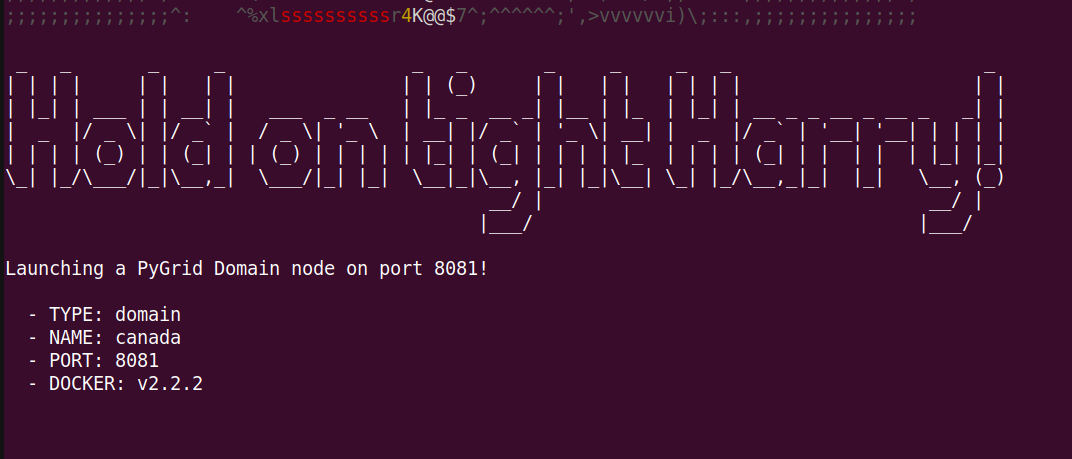


Now if you want to stop the running node or stack, we can use the `hagrid land` command.

To stop a particular domain/network node, we can specify the land command followed by the domain/network node name.

e.g. if the node is launch as follows:

`hagrid launch canada domain --tag=latest`

then, we can stop this domain as follows:

`hagrid land canada domain`

Moreover, if you stop all running domain/network nodes at once, we can call the command

`hagrid land all`

This kills all the running containers.


### UI Interface

We can view the UI by visiting the following url:

`http://localhost:<port_number>`

e.g.

`http://localhost:8081`.

We will see a screen as below:


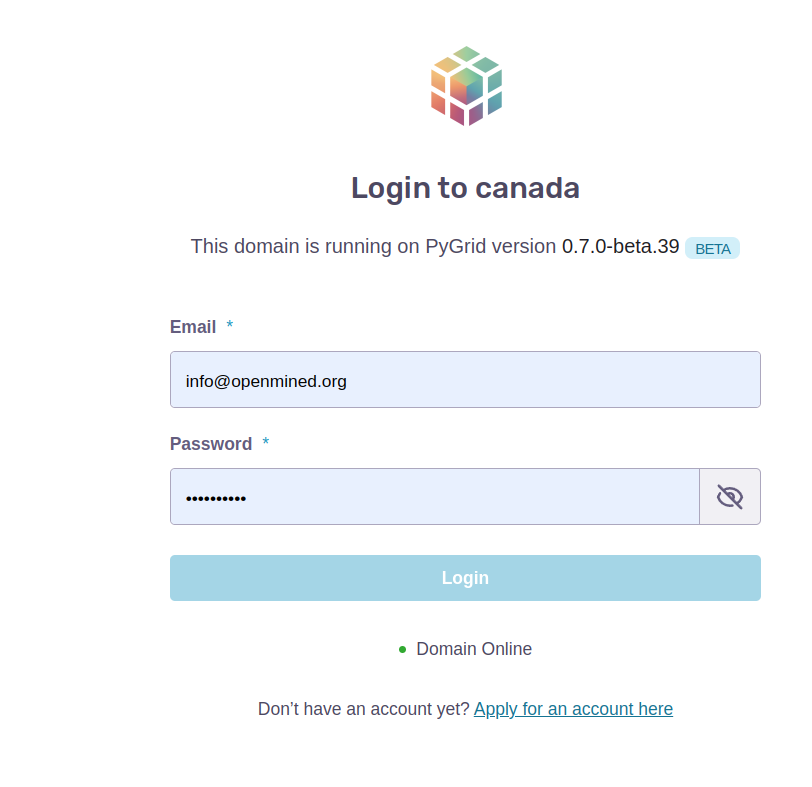

The default email and password for the domain are:
- email: `info@openmined.org`
- password: `changethis`

Once we're logged in, we will have the following view:

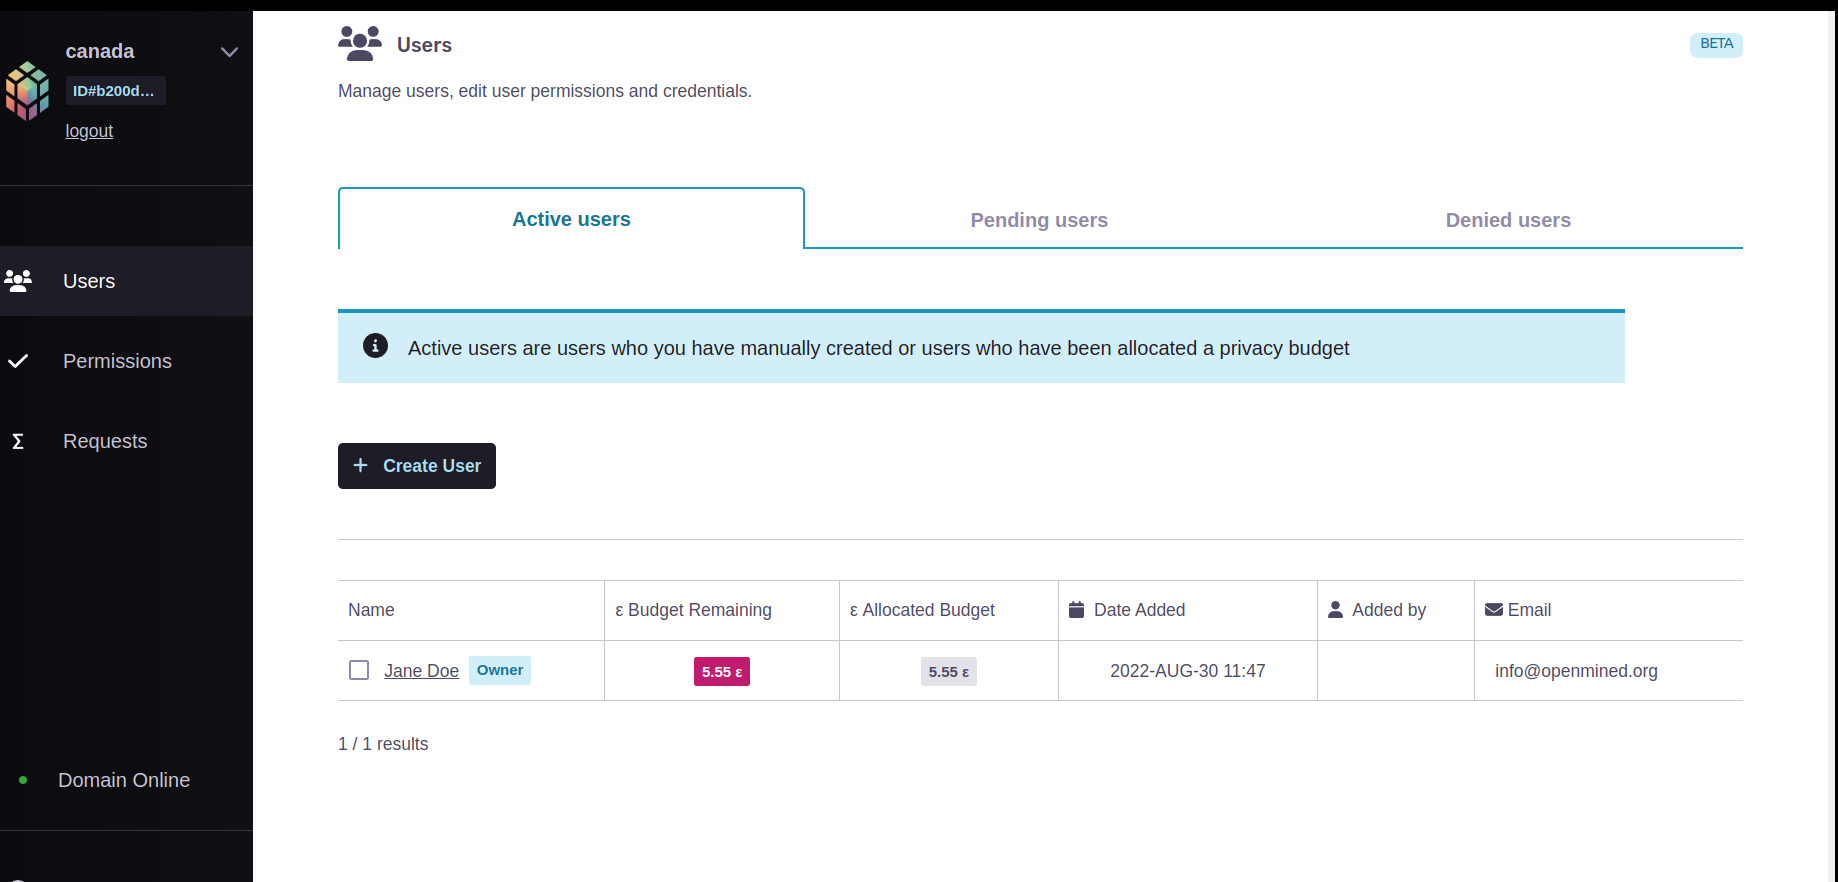

From the UI we can view and control the following:
- Users: Shows that list of users that are signed to the domain. We can create, edit or delete a user from this interface.
- Permissions: This list the different set of roles a user can have. Each role has a set of permissions which the DO can modify as per their norms.
- Requests: This list two types of requests `Data Requests` and `Privacy Budget Upgrade` requests.
    - Data Requests: If a user wants completes access to a data/variable they can request so from the DO. Such requests will be listed here and the DO can manually decided which ones to approve or reject.
    - Privacy Budget Requests: These requests pertain to the Privacy budget upgrade requested by a DS. The DO can decide if they want to assign the given privacy budget to the user or deny their requests.

### Types of running servers - On launching a Domain node

There are a bunch of servers that run when we launch a domain node. 

To list the running services/containers we can run the command `docker ps` from the commmand prompt.

Alternatively, we can use a tool called `ctop` we provides a much seemless experience for navigating across different containers.

#### Ctop

Ctop is a handy command line tool to view running containers/services. 

We can type `ctop` in the command line and we can see the list of containers running on the system.
We can navigate across different containers using arrow keys and press `q` on the keyboard to exit the tool.


For installation details click on the following link:
https://github.com/bcicen/ctop

When we type `ctop` on our terminal, we will have a view similar to the image below.

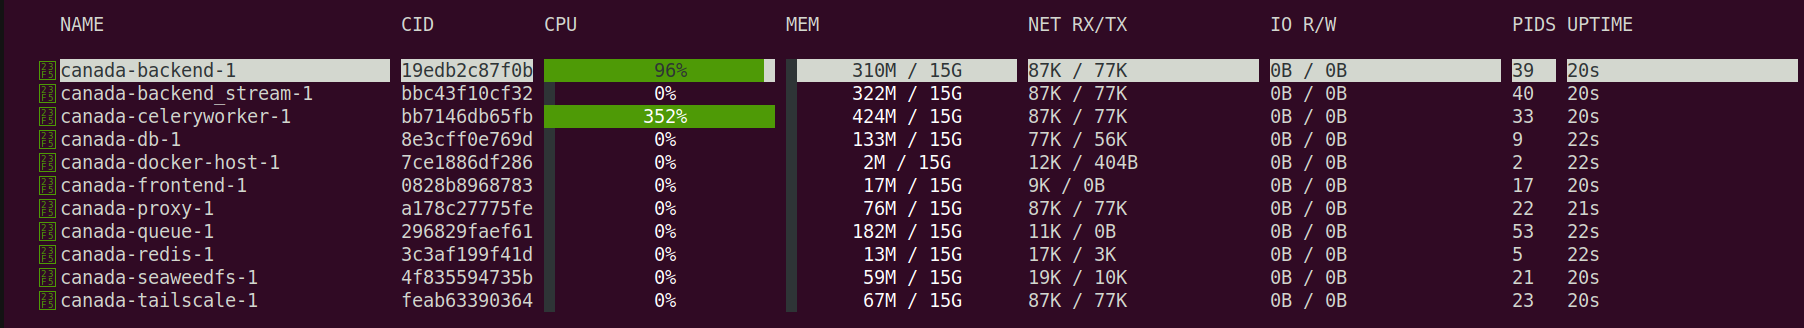

As we can see there are a bunch of services running. Below is a brief overview on each of them. 

We can see all the services are follow the nomeclarture: `<node_name>-<service>-<server_number>`.

- backend -> This server handles all synchronous requests.
- celerworker and backend_stream -> These two workers handles most of the asynchrounous requests or background tasks.
- queue: celery queue to which asynchronous tasks are posted
- db: This is the Postgres database server where all the relational tables are defined. e.g. SyftUser, Datasets, etc.
- redis: This is the Redis DB server where all the binary data (anything less than 1MB) is stored.
- seaweedfs: This is a fast distributed server used to storing large volumes of blob or binary data. Mainly used to store the uploaded dataset as blob or binary data.
- docker-host: It is used to connect all the containers so that each of them can talk to each other.
- tailscale: This server is used to hide a domain behind a VPN when a domain connects to a network.
- frontend: This the server used to host the UI/frontend code.

We can look at the logs of each container to debug an issue or are facing any error. We can either use `ctop` to do that or that docker command to view the logs of the running container: `docker logs -f <service_name>` e.g. `docker logs -f canada-backend-1`